<a href="https://colab.research.google.com/github/supportchelsea/Weather-Competition/blob/master/word2vec_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/supportchelsea/Weather-Competition.git

fatal: destination path 'Weather-Competition' already exists and is not an empty directory.


In [0]:
ls -al

total 20
drwxr-xr-x 1 root root 4096 Jul 25 23:45 ./
drwxr-xr-x 1 root root 4096 Jul 25 23:40 ../
drwxr-xr-x 1 root root 4096 Jul 19 16:14 .config/
drwxr-xr-x 1 root root 4096 Jul 19 16:14 sample_data/
drwxr-xr-x 5 root root 4096 Jul 25 23:45 Weather-Competition/


In [0]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!pip install konlpy
!pip install customized_konlpy

In [0]:
from konlpy.utils import pprint
from ckonlpy.tag import Twitter
from gensim.models import word2vec

import pandas as pd
import numpy as np

from tqdm import tqdm_notebook

import os
import sys

In [0]:
# set global random seed
import random
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
#     torch.manual_seed(seed)
#     torch.cuda.manual_seed(seed)
#     torch.backends.cudnn.deterministic = True

SEED = 42
seed_everything(SEED)

In [0]:
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 우선 fm._rebuild() 를 해주고
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic Eco


In [0]:
path = 'Weather-Competition/data/'
os.listdir(path)

['cleanser.csv',
 'creamlotion.csv',
 'lipcolor.csv',
 'suncare.csv',
 'nail.csv',
 'bodylotion.csv',
 'diet.csv',
 'lalavla.csv',
 'mask.csv',
 'lipcare.csv',
 'hairremoval.csv']

In [0]:
def open_csvs(path):

  dflist = os.listdir(path)
  mod = sys.modules[__name__]
  
  for df in tqdm_notebook(dflist):
    tmp = pd.read_csv(path+df).iloc[:,1:].fillna('')
    
    setattr(mod, '{}'.format(df.split('.')[0]), tmp)

In [0]:
open_csvs(path)

# !! 네일 !! 에 대한 word2vec 시각화를 할 것임!!

In [103]:
categories = {'네일' : ['네일', '세일'], '립컬러' : ['틴트', '립스틱','립무스', '립펜슬' ], '립케어' : ['립오일','립밤','립글로즈'], '마스크팩':['마스크팩'], '바디로션':['바디로션'], '선케어':['선크림','선스틱','선쿠션','썬크림','썬스틱','썬쿠션'], '제모제':['제모제', '왁싱패치', '제모크림', '왁스스트립'], '체중조절':['체중조절', '다이어트간식' , '다이어트바'], '크림로션':['스킨', '토너', '로션', '에센스','수분크림'], '훼이셜클렌저':['클렌징', '아이리무버', '클렌저']}
categories = [j for i in categories.values() for j in i]

#도메인 정보
dic_add = ['브라이트닝','알로에', '마테카소이드','지성','건성','기능성','데오드란트','폴리쉬','화이트닝',
           '쿨톤','웜톤','발림성','파데','쿠션','올영','롭스','랄블','랄라블라','미스트','스티커',
          '패디','글리터','매트','데싱디바','젤라또팩토리','아리따움','젤네일','패디큐어','폴리쉬','베이스','탑노트',
           '매트','무광','유광','자개','파츠','네일아트','쏙오프','큐티클','하또하또','모디','레이디버그'] #도메인에 따라

#브랜드 별
dic_add2 = ['그라펜', '갓투비', '경남제약', '그린핑거', '갭', '가디언', '구달', '게스', '깨끗한나라', '그린벨', '꿀톤', '글램디', '갸스비', '겐조', '게리쏭', '까르띠에', '끌로에', '고려은단', '과일나라', '꼬달리', '그라펜', '갓투비', '경남제약', '그린핑거', '갭', '가디언', '구달', '게스', '깨끗한나라', '그린벨', '꿀톤', '글램디', '갸스비', '겐조', '게리쏭', '까르띠에', '끌로에', '고려은단', '과일나라', '꼬달리', '니베아', '네시픽', '네즈', '누메로', '네어', '노멀노모어', '뉴트로지나맨', '네이크업페이스', '나나스비', '네페라', '니오베', '닐스야드레머디스', '누밍크', '나트라케어', '네오젠 코드나인', '나이팅게일', '네오덤', '니베아 맨', '노블레스 케어', '네오젠더마로지', '나츄리에', '눅스', '뉴트로지나', '던롭', '더마리프트', '두칼라', '드림웍스', '닥터자르트', '닥터그루트', '돌체앤가바나', '듀크레이', '디어러스', '더프트앤도프트', '더발림', '데이위드', '다슈', '닥터지', '닥터펩티', '도브', '데톨', '돌리윙크', '닥터패커', '다이안', '더블유드레스룸', '듀이트리', '데시구알', '달바', '닥터시드', '달리프', '댕기머리', '더뷰티풀 팩터', '데자뷰', '더마비', '달팡', '닥터브로너스', '데메테르', '디어패커', '닥터포헤어', '닥터크롬셀', '데비타', '다크니스', '더티웍스', '닥터프로그', '레노', '레브론', '라로슈포제', '로즈앤코', '리엔', '라이프4.0', '릴리안', '롤린느', '라운드어라운드', '라끄베르', '라운드랩', '레브르', '레르드사봉', '로레알파리', '루나', '롭스', '랩시리즈', '라보케어', '리스킨', '리얼 테크닉스', '락시옹', '리젠코스메틱', '랄프로렌', '라노립스', '립스매커', '라우쉬', '라포티셀', '리피엘', '랩피토', '려', '라카', '르네휘테르', '루디', '루카스포포레메디스', '리더스코스메틱', '랄라블라', '랩노', '레이티드그린', '로벡틴', '립플레저', '리얼베리어', '릴리바이레드', '리스태포드', '레인보우라이트', '라라', '라프', '로레알 프로페셔널 파리', '린제이', '라이징웨이브', '루시도엘', '루루룬', '리듀어', '랑방', '라보타치', '마쉐리', '맥스클리닉', '메이크프렘', '모노템', '메디어스', '메머레르', '몽블리', '밀턴로이드', '미라클 아일랜드', '무스텔라', '마이뷰티다이어리', '마이달리아', '몽블랑', '메소드', '마죠리카 마죠르카', '미팩토리', '마크앤써니', '마크제이콥스', '메디힐', '미쟝센', '밀리마쥬', '메디큐브', '메리트', '무코타', '메이앤준', '마케리마케', '모스키노', '맨담', '맨담 베이비베일', '메이크온', '마몽드', '마데카21', '메이브리즈', '멕리듬', '미남프로젝트', '미라클로망스', '메이블린 뉴욕', '미소스', '미스티안', '멘소래담', '미니언즈', '미스사사', '미슬린', '베르사유의 장미', '백도씨테일러', '쁘띠페', '빅토리아', '뷰티모리', '부르조아', '비욘드 더레미디', '보닌', '뷰티스푼', '보코통', '보다나', '브링그린', '불독', '블랙모어스', '비너스스파', '빠니에 데 썽스', '블리스', '삐아', '베리썸', '바디럽', '브라운', '브라운랩', '바슈롬', '비비또', '뷰티에어포트', '바이오오일', '비꼼비오', '빅', '베네피트', '바나브', '비쉬', '블리스텍스', '버츠비', '바이비드', '비페스타', '보타닉팜', '보만', '빠이요', '바이빠세', '바티스트', '블라이드', '버블티', '바이오피엘', '비판톨', '바실리사', '벤튼', '뷰티쉐이크', '비엘렌다', '발레아', '바비리스', '뷰티라보', '비오템', '보타니쿠스', '뷰티리더', '브리스킨', '비달사순', '부츠', '베르사체', '비프루브', '빈티지앤코', '밤코스메틱', '바디판타지', '뷰티블렌더', '바이오더마', '보타닉힐 보', '빌리', '버버리', '비더마틱', '보드맨', '불가리', '뷰코셋', '바디네이처', '부츠에센셜', '블루바틀', '바세린', '보타닉스', '베리떼', '바디홀릭', '브레오', '베라왕', '블리블리', '보브', '비앤비', '분스', '비오텀', '비트', '보태니컬즈', '비밸런스', '비욘드', '블랙몬스터', '베이크어반', '비셰', '뷰티포뮬라', '바이손', '브이에이피', '바바솔', '보타닉힐 보 아이디얼 포 맨', '싸이닉', '스킨알엑스랩', '셀라피', '스미스 로즈버드살브', '센트룸', '수아도르', '슈퍼페이스', '스틸라', '샤인이지글램', '셀퓨전씨', '스무스 어웨이', '솔가', '쏘실크', '썸머스이브', '쉬즈라인', '신신제약', '스웨거', '슬림워크', '쉐이브더닥터', '슈바츠코프', '썸바이미', '시루콧토', '씨제이제일제당', '사포렐', '스팀크림', '사이오스', '심플', '시카고', '손앤박', '실크테라피', '쉬크', '수려한', '세타필', '순수한면', '씨위드배스', '쏘피', '스타롤', '소문', '사보리노', '시에로', '셀리한센', '씽크네이처', '세노비스', '샬랑드파리', '시세이도', '세렌디뷰티', '스킨79', '샤프란', '셀린저', '시바비젼', '수이사이', '세븐피엠', '식물나라', '셀더마', '센카', '스와니코코', '스칼프 디', '셀렉스C', '스키니탠', '시코르', '시크릿 드 프로방스', '쌍빠', '사베마송', '세이어스', '세바메드', '샘케이', '쇼파드', '쎄페', '세인트이브스', '솝앤글로리', '소프리스', '셀로몬', '슈얼리', '아이시화이트', '온더바디', '위드컵', '올리브놀', '양키캔들', '아임오', '이지듀', '엔젤루카', '에비앙', '에프와이오', '아모레퍼시픽', '아임프롬', '에이프릴스킨', '유닉스', '애경', '얼라이브랩', '인티메이트', '올레이', '엘리자베스아덴', '아이소이', '아쿠아사봉', '얼타3', '이즈앤트리', '에프쓰리 시스템즈', '아쿠아퍼', '아트릭스', '우드윅', '어니시', '아이캔디', '오데즈알프스', '우드버리', '에이티폭스', '오리진스', '아미니', '에이트바이포', '오리지널 스프라우트', '아토팜', '아이오페', '아비브', '원스인어문', '아르페', '웻앤와일드', '엔젤로니아', '이엘에프 코스메틱스', '아크웰', '웨신', '아벤느', '아넷사', '오하나마하로', '아르데코', '오페라', '오딧세이', '엔티엠티', '아이크라운', '인코코', '우르오스', '유리카', '아킬렌', '아발론오가닉스', '에너지 팩토리', '이뮤랩', '오오시마츠바키', '엘라스틴', '엘비다', '에데낭스', '에이전트 프로보가터', '어반랩', '애플린', '아비노', '아크로패스', '언파코스메틱', '에끌라두', '오를리', '웨이크메이크', '아로마티카', '앙포레', '아델', '올리브영', '알티야 오가닉스', '알프레산', '아비노베이비', '아로마코', '없었던일로', '유리아쥬', '아꼬제', '이솔', '에센스', '안나수이', '앙스스킨', '아임미미', '유세린', '에이씨케어', '에코툴즈', '아로니카', '엘르걸', '에스테덤', '오리지널소스', '오이보스', '아크네스', '이자녹스', '아자로', '어파티', '예지미인', '유리프', '아르코맨', '잉가', '아하바', '어라운드 뷰티', '욥', '애드리언 게그넌', '알페신', '아이참', '위클리랩', '오킵스', '얼트루', '에보니', '엘리자베카', '엠도씨', '에네스티', '엘리스', '오가니스트', '웰코스', '아쿠탑', '엔시아', '이브로쉐', '아리얼', '올리세', '일리윤', '입큰', '어라운드미', '쥬시꾸뛰르', '지베르니', '주트', '종근당', '지알에이트/GR8', '존슨즈베이비', '지미추', '자트인사이트', '존슨즈바디케어', '제이슨내추럴', '질경이', '질레트', '저스트세라', '자민경', '제니퍼로페즈', '졸렌', '존바바토스', '제이준코스메틱', '제이숲', '지오마', '존마스터스오가닉', '조성아22', '좋은느낌', '존프리다', '챠밍키스', '치카이치코', '촉촉젤스', '츠바키', '천사연구소', '챕스틱', '클린앤클리어', '클린', '코드 글로컬러', '클렌슈어', '코엘프', '케라시스', '캄모멘트리', '코코아일랜드', '캐스키드슨', '코스알엑스', '코리아나', '카밀', '크레모랩', '컨퓸', '케이팔레트', '키쿠보시', '컬러그램톡', '크라시에', '클럽맨피노드', '쿤달', '케이트', '컬러그램', '클로란', '캐트리스', '키스미', '코치', '큐어시스', '클리오', '코지', '크리넥스', '카이', '크리니크', '캘빈클라인', '캔메이크', '캐시캣', '케어존', '카오리온', '코티지', '텐드스킨', '토니가드', '토니앤가이', '토리든', '트리헛', '투쿨포스쿨', '티엔', '티타니아', '터치인솔', '티트리앤위치하젤', '트위저맨', '트리클문', '트레제메', '투마루', '탱글티저', '타다코스메틱', '티스', '타이거밤', '프리맨', '프라다', '포인트', '플라워가든', '페라가모', '프레쉬라이트', '폴스미스', '프럼네이처', '포블링', '플란테시스템', '페라리', '플라센타 베제딸', '플루', '피죤', '피토메르', '픽스앤톡스', '페인토즈', '포니이펙트', '프라간시아', '페브리즈', '페이스인페이스', '프라이웰', '폴리쉬드런던', '피지오겔', '페어리 드롭스', '폰즈', '파파레서피', '포레스트스토리', '플로르드망', '필립스', '폴라초이스', '포맨트', '페리페라', '피지션스 포뮬러', '퓨렌스킨', '플란투어39', '픽스앤루즈', '폴라탐', '플로랑스 네이처', '팬틴', '필로소피', '펨프레쉬', '해피바스', '헤어플러스', '하루하루', '하다라보', '헤지스맨 룰429', '히또그램', '헬로키티', '헤리에타', '홀리스터', '화이트래빗', '홍샷', '헤어 리추얼 바이 시슬리', '히말라야', '허로우', '허바신', '화이트', '허벌에센스', '휴고 내츄럴', '후후', '하와이안 트로픽', '후로후시', '해서린바이엘리자베스', '헤이미쉬', '휴족시간', '한스킨', '화흥']

twitter = Twitter()
twitter.add_dictionary(categories, 'Noun')
twitter.add_dictionary(dic_add, 'Noun')
twitter.add_dictionary(dic_add2, 'Noun')

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [0]:
def get_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [0]:
high_temp = [20180802.0, 20180801.0, 20180803.0, 20180731.0, 20180730.0, 20180815.0, 20180814.0, 20180729.0, 20180723.0, 20180724.0, 20180722.0, 20180804.0, 20180808.0, 20180727.0, 20180810.0, 20180807.0, 20180813.0, 20180811.0, 20180812.0, 20180806.0]
high_temp = [str(i)[:-2] for i in high_temp]

low_temp = [20180203.0, 20181209.0, 20181229.0, 20180110.0, 20181230.0, 20181208.0, 20180129.0, 20180207.0, 20180205.0, 20180204.0, 20181227.0, 20180206.0, 20180112.0, 20181228.0, 20180127.0, 20180111.0, 20180123.0, 20180125.0, 20180124.0, 20180126.0]
low_temp = [str(i)[:-2] for i in low_temp]

high_hu = [20180517.0, 20180701.0, 20180828.0, 20180702.0, 20181108.0, 20180516.0, 20180827.0, 20180315.0, 20180423.0, 20180512.0, 20181203.0, 20180921.0, 20180626.0, 20180824.0, 20180502.0, 20180710.0, 20180405.0, 20180829.0, 20180304.0, 20180506.0] 
high_hu = [str(i)[:-2] for i in high_hu]

low_hu = [20180128.0, 20181128.0, 20181226.0, 20180205.0, 20180206.0, 20180412.0, 20180126.0, 20181228.0, 20181208.0, 20181207.0, 20181209.0, 20180125.0, 20180221.0, 20180218.0, 20180124.0, 20181229.0, 20180215.0, 20180413.0, 20180217.0, 20181227.0]
low_hu = [str(i)[:-2] for i in low_hu]

rainy = [20180122.0, 20180223.0, 20180228.0, 20180301.0, 20180304.0, 20180305.0, 20180308.0, 20180315.0, 20180318.0, 20180319.0, 20180321.0, 20180404.0, 20180405.0, 20180406.0, 20180408.0, 20180410.0,
         20180414.0, 20180422.0, 20180423.0, 20180424.0, 20180502.0, 20180503.0, 20180506.0, 20180512.0, 20180516.0, 20180517.0, 20180518.0, 20180522.0, 20180523.0, 20180529.0, 20180530.0, 20180609.0, 20180610.0, 20180611.0,
         20180614.0, 20180615.0, 20180626.0, 20180628.0, 20180629.0, 20180630.0, 20180701.0, 20180702.0, 20180703.0, 20180705.0, 20180709.0, 20180710.0, 20180711.0, 20180728.0, 20180805.0, 20180806.0, 20180809.0, 20180812.0, 20180813.0,
         20180815.0, 20180821.0, 20180823.0, 20180824.0, 20180826.0, 20180827.0, 20180828.0, 20180829.0, 20180830.0, 20180903.0, 20180906.0, 20180907.0, 20180915.0, 20180916.0, 20180920.0, 20180921.0, 20180922.0, 20181005.0, 20181006.0,
         20181010.0, 20181023.0, 20181026.0, 20181028.0, 20181107.0, 20181108.0, 20181121.0, 20181124.0, 20181203.0, 20181204.0]
rainy = [str(i)[:-2] for i in rainy]

In [0]:
def df_split_weather(df):
  
 

  df.columns = [str(i).replace("-","") for i in df.columns]
  
  mod = sys.modules[__name__]
    
  _high_temp = df[high_temp]
  _low_temp = df[low_temp]
  _high_hu = df[high_hu]
  _low_hu = df[low_hu]
  _rainy = df[rainy]
  
  setattr(mod, '{}_{}'.format(get_name(df),get_name(high_temp)), _high_temp)
  setattr(mod, '{}_{}'.format(get_name(df),get_name(low_temp)), _low_temp)  
  setattr(mod, '{}_{}'.format(get_name(df),get_name(high_hu)), _high_hu)  
  setattr(mod, '{}_{}'.format(get_name(df),get_name(low_hu)), _low_hu) 
  setattr(mod, '{}_{}'.format(get_name(df),get_name(rainy)), _rainy)

In [0]:
df_split_weather(nail)

In [0]:
nail_high_temp.head(3)

,20180802,20180801,20180803,20180731,20180730,20180815,20180814,20180729,20180723,20180724,20180722,20180804,20180808,20180727,20180810,20180807,20180813,20180811,20180812,20180806
0,그리고 나름 세계 여성들의 연대랍시고 이렇게 손 그려놓은 일러 굉장히 많은데 노무웃...,180601 Premium Concert 1부우리 하니현이 네일KMF화이팅~~#14...,180803 #연정 #우주소녀2개월만에 눈썹도 옅어지고 머리색도 바뀌고 네일도 바뀌...,180731 마마님 ㅋㅋㅋㅋㅋㅋㅋ 싸인해쥬시다가 덕구가 네일하셨냐고 여쭤보니까 바로...,소라루 라고 치면 소라루 네일 이라고 뜨네 일본에 탐라 이번엔 네일인가,"인권: '현대판 노예'... 바로 우리 곁에 있다 … ""네일샵에 가서 아무 생각없이...",글구 어제 엄마가 네일해줬다.... 스킬이 느셨어... 예뻐......,세후니 손. 네일 ㅜㅅㅜ,"네일 하기전에 뽈 유 이러면서 똘망쓰하게 색 골라줘서 또 1초만에 그걸로 결정,, ...","이번에 일본 가서 급하게 네일 붙엿는데 지인분들, 친구들이랑 다들 예쁘다고 해줘서 ...",ops. didnt meant to mess up the living room i...,오늘 원고 못햇어ㅠㅠ 그치만 네일햇으니께ㅎ,Foojeenail. Beard OP! 푸지네일 수염 간지 최고! @theFooJe...,오늘 붙이는 젤네일을 사봤고 지금 한번 해보겟읍니다,아픈게 다 무슨 소용인가내일 나인인치네일스 보러간다오늘 라우드니스 보고왔다 돌아오는...,티르 코네일 학교 뒷편의 작은 뜰에는 타고다니면 재밌을 것 같은 손수레가 있다! 요...,네일의 유무,"나인 인치 네일스. 지금까지 본 어떤 공연, 영상보다 더 재밌었다. 어지간한 건 음...",아 나 진짜 어이업고 답답해 어떻게 이러지 여러분들은 나인인치네일스 원래 조아하셧을...,AtR 라이브 참전용 네일!! ( •̀ᴗ•́ )و ̑̑양손 엄지에 대따 큰 스톤 붙...
1,#페미니즘 #페미 #페미니스트 를 검색하면 나오는 대부분의 그림들ㅋㅋㅋㅋㅋㅋ노무딱 ...,기혼여성 고객 입장이다보면 서비스직 종사자로부터 결혼 얘기를 많이 듣는다. 무난한 ...,샘들 다이소에 네일 패치 나온건 아십니까??저는 개인적으로 되게 만족ㅠㅠㅠㅠ,네일 일케 해써ㅋㅋㅋㅋㅋㅋㅋ미치겠넼ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,유니 샘들 저 네일했어용 존예탱!!!!,내가술먹고왜그랫는지알았어.. 어제나는 약속파토나서혼자 집에있는데 걔는 언니랑맘스터치...,2018 인천 펜타포트 락 페스티벌 2018.08.11Nine Inch Nails ...,러스티네일,#東方Project #東方project#7코 #7월서코 #동방프로젝트#후지와라노모코...,레이겐 손톱 딱 좋을 정도의 길이로 또각또각 깎아주고 잘린 부분에 거스러미 생겨서 ...,딱히 할말은 없고 우리 애 흰색 네일이 겁나 기엽습니다..,가만보면 네일은 항상 지슥가 화려하고 잰이는 거의 맨손이야... 이거 잰추라는 거 ...,이쿠야 색으루 네일함,밍구 손톱 길렀대서 나도 일땜에 못기르다 요새 기르고 있다고 서로 자랑ㅋㅋ 내가 오...,심심해서 타타네일 했당 ㅋㅋㅋㅋㅋ 인데...스티커가 두꺼워서 뜬다ㅜㅜㅜㅜㅜ#Epip...,티르코네일의 새싹들 귀여워! 하고 스샷찍으려고 했더니 비가 오기 시작했다..,키라키라네일,여러 굿즈들 판매합니다!!-앙스타 굿즈피네+트릭스타 네일스티커 6000원미카 메탈 ...,굳이 따지자면 무해남 판 도사린은 듀아네일 사상 처음으로 등장한 중립 선 인물이 아...,이짤 하나부터 열까지 너무 쩐다 후 후; 손톱진자 예브네 네일한거보고싶다
2,오예손톱 그리기 귀찮아따 네일 사야징 희희,180715 삼성 베어홀 팬사인회네일 아트 자랑하는 차니 ㅎㅎ잘 만드셨네요 역시 유...,내 결혼식 빼고는 처음으로 네일샵에서 메뉴큐어를 했다. 워낙 손 놀리는걸 많이 하다...,네일 맘에 들어 ㅜ0ㅜ,네일 했어요 나기랑 타마키?!,재환이 우진이 파란 제복 입었던 거 갑자기 너모 조와서 파란계열루 네일 한 !,잇자나요... 이 사진... 네일도 버건디야...,루카 발가락에 네일하고 잠시 누웠는데 이불에 검정색 네일뭍음,네일 할 생각 1도 없었는데 따완이가 오늘은 마사지 대신 네일 하는 거 어떻냐고 물...,쿠키 네일스티커! 이런건 또 언제 나왔는지 귀엽,뱀이 댓글 귀여운 와중에 베이비 네일 넘 시강ㅋㅋㅋㅋㅋㅋ 그 오빠에 그 동생ㅋㅋㅋ,네일 배부할 슬로건은 인증방법 둘 중 하나 선택하면 됩니다&gt;&lt; …,네일까지 올블랙인게 설레는 부분,저 사실 찬백일 때 짾허시 네일한 거 짱 좋아함,네일 질리기도했구 넘길어서 지웠는데 다시사진보니까 이쁘네ㅋㅋㅋㅋㄱ 따흑흑극윽,톨비쉬 재등장 할때 이랬으면 좋겠다..1. 성소에서 그 복장으로 호출2. 게이트에서...,네일 사진 새로 찍었오ㅇㅅㅇ 삼각대랑 카메라 안가져와서 몸 비틀며 폰으로 찍음..,"건강한 손톱은 연한 분홍빛이 돌고, 손톱 뿌리에 흰색 반달이 또렷하게 나타나는 것이...",맞다 그리구 네일 한 지 하루만에 저렇게 벗겨지는건 첨봤어ㅠㅠㅠㅠ무슨 네일팁인줄,내가 네일을 바꿀 수도 있지.


---
# 전체 Corpus 전처리

In [104]:
#전체 
list_corpus = []
for date in tqdm_notebook(nail.columns):
  for unit in nail[date].dropna().tolist():
    temp_corpus = twitter.pos(unit)
    temp_corpus = [tag[0] for tag in temp_corpus if tag[1]=='Noun' and len(tag[0])>1]
    list_corpus.append(temp_corpus)

In [0]:
from collections import Counter

total_corp = [j for i in list_corpus for j in i]

total_common = Counter(total_corp).most_common()[0:80]
total_common = [i[0] for i in total_common]

In [0]:
# 전체
remove_list = [ '지고','존나','위해','거나','라서','구나','여운','처음','언제','바로','가지','래서','아무','마다','처럼', '사용', '여기',  '무슨',  '혼자',  '계속',  '완전',  '행복',  '관리',  '보이',  '주문',  '사실',  '선물', '어요', '오늘', '어서', '진짜', '사진', '해주', '까지', '보고', '생각', '면서', '다가', '사람', '이번', '티르', '기분', '코네', '다시', '시간', '지금', '느낌', '오랜만', '려고', '하나', '붙이', '감사', '사랑', '어제', '스티', '내일', '재즈', '머리', '더니', '그냥', '때문', '이나', '우리', '친구', '하니', '다른', '아하', '부터', '다음', '정말', '이제', '커미션', '마음', '이름', '무대', '기사', '베가', '여러분', '아주', '발라', '여주', '드디어']

for i in total_corp:
  if i in remove_list or len(i) < 2:
    total_corp.remove(i)

In [113]:
Counter(total_corp).most_common(30)

[('네일', 5847),
 ('손톱', 498),
 ('젤네일', 211),
 ('스티커', 194),
 ('자랑', 167),
 ('셀프', 132),
 ('언니', 125),
 ('디자인', 108),
 ('반짝', 108),
 ('컬러', 105),
 ('핑크', 89),
 ('네일아트', 84),
 ('파츠', 83),
 ('다이소', 75),
 ('글리터', 74),
 ('여름', 73),
 ('예약', 66),
 ('이벤트', 65),
 ('기념', 65),
 ('아트', 65),
 ('블랙', 64),
 ('신상', 62),
 ('생일', 60),
 ('손가락', 60),
 ('매니큐어', 58),
 ('자기', 58),
 ('제작', 55),
 ('세트', 53),
 ('화려', 52),
 ('컨셉', 52)]

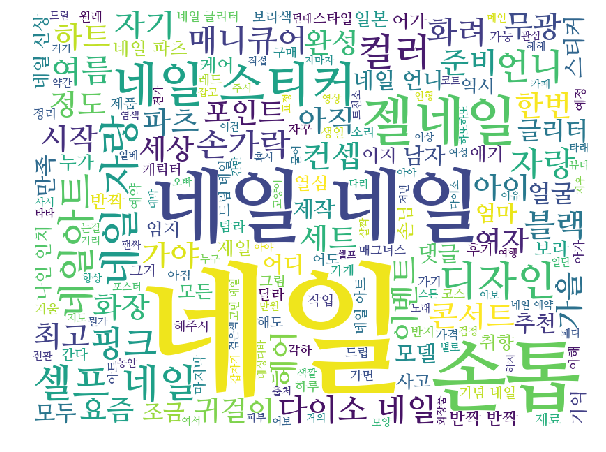

In [114]:
str1 = ' '.join(total_corp)

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'

wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate(str1)
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)


---
# 비오는 날 corpus 전처리

In [115]:
list_corpus = []
for date in tqdm_notebook(nail_rainy.columns):
  for unit in nail[date].dropna().tolist():
    temp_corpus = twitter.pos(unit)
    temp_corpus = [tag[0] for tag in temp_corpus if tag[1]=='Noun' and len(tag[0])>1]
    list_corpus.append(temp_corpus)

In [0]:
rainy_corpus = [j for i in list_corpus for j in i]

In [0]:
from collections import Counter

rainy_common = Counter(rainy_corpus).most_common()[0:80]
rainy_common = [i[0] for i in rainy_common]

In [0]:
remove_list = ['오늘', '존나','누가','여기','어도','한번','처음','래서','지고','여러분','완전','구나', '어요',  '사진',  '면서',  '까지',  '진짜',  '해주',  '자랑',  '다가',  '티르',  '사람',  '보고',  '이번',  '생각',  '어서',  '시간',  '코네',  '다시',  '다음',  '지금',  '붙이',  '느낌',  '오랜만',  '우리',  '려고',  '기분',  '하나',  '때문',  '그냥',  '드디어',  '아무',  '마음',  '처럼',  '이나',  '거나',  '사랑',  '정말',  '다른',  '마다',  '머리',  '기사',  '이제',  '무슨',  '친구',  '어제',  '더니',  '가지',  '감사',  '재즈',  '여주',  '이름',  '매그너스',  '스티',  '부터',  '가야',  '소리']

for i in rainy_corpus:
  if i in remove_list or len(i) < 2:
    rainy_corpus.remove(i)

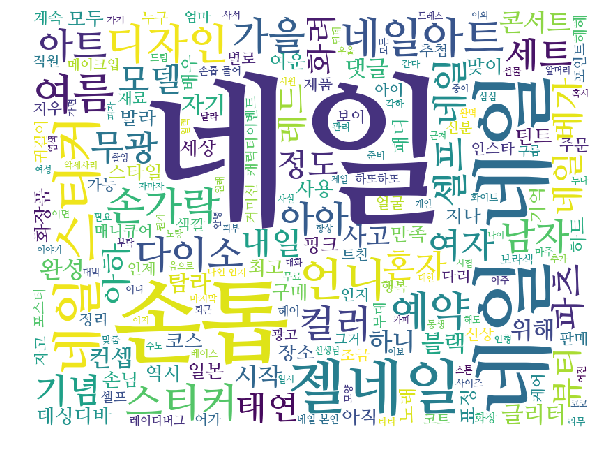

In [123]:
str1 = ' '.join(rainy_corpus)

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'

wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate(str1)
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)

# 습도관련 
##  - 습한날


In [124]:
list_corpus = []
for date in tqdm_notebook(nail_high_hu.columns):
  for unit in nail[date].dropna().tolist():
    temp_corpus = twitter.pos(unit)
    temp_corpus = [tag[0] for tag in temp_corpus if tag[1]=='Noun' and len(tag[0])>1]
    list_corpus.append(temp_corpus)

In [0]:
high_hu_corpus = [j for i in list_corpus for j in i]

In [0]:
from collections import Counter

high_hu_common = Counter(high_hu_corpus).most_common()[0:80]
high_hu_common = [i[0] for i in high_hu_common]

In [0]:
remove_list = [ '오늘', '끼리','티르', '오지','사실','드디어','갑자기','정말','한번','하나','여러분','코네', '어요', '생각', '까지', '사람', '이번', '어서', '지금', '면서', '다가', '다시', '기억', '다른', '느낌', '진짜', '붙이', '보고', '아무', '려고', '우리', '때문', '머리', '스티', '이나', '남자', '해주', '시간', '이름', '그냥', '코코', '장소', '처럼', '내일', '재즈', '다음', '감사', '무대', '추첨', '아아', '사서', '달라', '얼굴', '소리', '가기', '언제']

for i in high_hu_corpus:
  if i in remove_list or len(i) < 2:
    high_hu_corpus.remove(i)

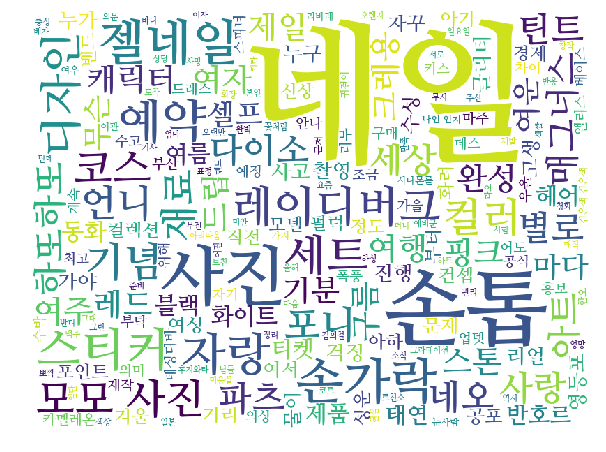

In [136]:
str1 = ' '.join(high_hu_corpus)

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'

wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate(str1)
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)

## 건조한 날

In [137]:
list_corpus = []
for date in tqdm_notebook(nail_low_hu.columns):
  for unit in nail[date].dropna().tolist():
    temp_corpus = twitter.pos(unit)
    temp_corpus = [tag[0] for tag in temp_corpus if tag[1]=='Noun' and len(tag[0])>1]
    list_corpus.append(temp_corpus)

In [0]:
low_hu_corpus = [j for i in list_corpus for j in i]

In [0]:
from collections import Counter

low_hu_common = Counter(low_hu_corpus).most_common()[0:80]
low_hu_common = [i[0] for i in low_hu_common]

In [0]:
remove_list = ['어요', '오늘', '생각', '어서', '진짜', '다른', '하니', '기분', '이번', '보고', '해주', '까지', '려고', '붙이', '다가', '사진', '지금', '한번', '수호', '티르', '오른손', '사람', '커미션', '하나', '다시', '시간', '선수', '세상', '코네', '면서', '마다', '재즈', '위해', '간다', '뱀뱀', '어도', '이제', '매그', '드디어', '일단', '래서', '요즘', '내일', '다음', '가지']

for i in low_hu_corpus:
  if i in remove_list or len(i) < 2:
    low_hu_corpus.remove(i)

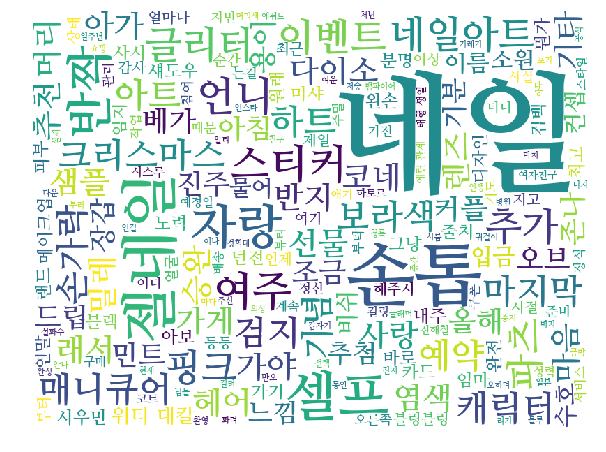

In [143]:
str1 = ' '.join(low_hu_corpus)

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'

wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate(str1)
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)

# 추운날

In [144]:
list_corpus = []
for date in tqdm_notebook(nail_low_temp.columns):
  for unit in nail[date].dropna().tolist():
    temp_corpus = twitter.pos(unit)
    temp_corpus = [tag[0] for tag in temp_corpus if tag[1]=='Noun' and len(tag[0])>1]
    list_corpus.append(temp_corpus)

In [0]:
low_temp_corpus = [j for i in list_corpus for j in i]

In [0]:
from collections import Counter

low_temp_common = Counter(low_temp_corpus).most_common()[0:80]
low_temp_common = [i[0] for i in low_temp_common]

In [0]:
remove_list = ['어서', '어요','오랜만' ,'일베','이나','리고','만큼','완전','약간','조금','오늘', '다가', '베가', '진짜', '까지', '생각', '이번', '하나', '면서', '해주', '기분', '부터', '보고', '려고', '태형', '계속', '한번', '이제', '때문', '사람', '물어', '내일', '기사', '라서', '더니', '감사', '시간', '언제', '래서', '어제', '일단', '다른', '얘기', '지금', '각하', '붙이', '거리', '부탁', '원래']

for i in low_temp_corpus:
  if i in remove_list or len(i) < 2:
    low_temp_corpus.remove(i)

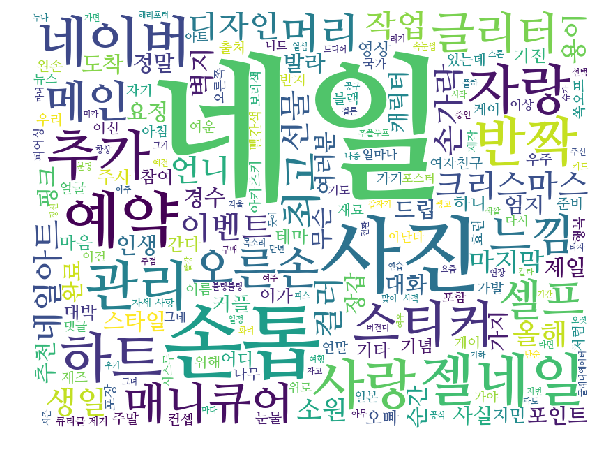

In [154]:
str1 = ' '.join(low_temp_corpus)

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'

wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate(str1)
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)

# 더운날

In [155]:
list_corpus = []
for date in tqdm_notebook(nail_high_temp.columns):
  for unit in nail[date].dropna().tolist():
    temp_corpus = twitter.pos(unit)
    temp_corpus = [tag[0] for tag in temp_corpus if tag[1]=='Noun' and len(tag[0])>1]
    list_corpus.append(temp_corpus)

In [0]:
high_temp_corpus = [j for i in list_corpus for j in i]

In [0]:
from collections import Counter

high_temp_common = Counter(high_temp_corpus).most_common()[0:80]
high_temp_common = [i[0] for i in high_temp_common]

In [0]:
remove_list = ['오늘', '진짜', '생각', '까지', '붙이', '어서', '어요', '보고', '어제', '다가', '사람', '나인', '인치', '면서', '려고', '하나', '지금', '더니', '내일', '해주', '이름', '친구', '시간', '무슨', '티르', '얘기', '실물', '콘서트', '우리', '계속', '혼자', '일스', '한번', '부분', '백현', '보이', '이번', '간다', '구나', '지고', '아하', '팬미팅', '중인', '계정', '그냥', '다니엘', '다시', '타타', '따완', '아주', '녜리', '공연', '백시', '테잎', '코네']

for i in high_temp_corpus:
  if i in remove_list or len(i) < 2:
    high_temp_corpus.remove(i)

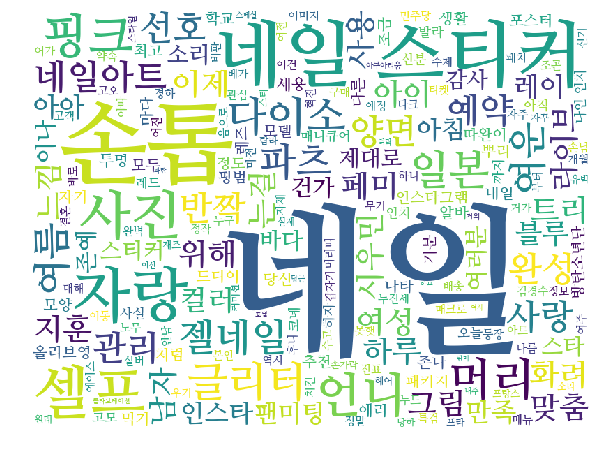

In [163]:
str1 = ' '.join(high_temp_corpus)

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'

wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate(str1)
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)

In [172]:
print(Counter(total_corp).most_common(20)[-1])
print(Counter(high_temp_corpus).most_common(20)[-1])
print(Counter(low_temp_corpus).most_common(20)[-1])
print(Counter(high_hu_corpus).most_common(20)[-1])
print(Counter(low_hu_corpus).most_common(20)[-1])
print(Counter(rainy_corpus).most_common(20)[-1])

('아트', 65)
('예약', 4)
('최고', 5)
('별로', 5)
('마지막', 5)
('반짝', 15)


# word2vec

In [0]:
word2vec_model = word2vec.Word2Vec(total_corp, min_count=65)

word2vec_model_1 = word2vec.Word2Vec(high_temp_corpus, min_count=4)
word2vec_model_2 = word2vec.Word2Vec(low_temp_corpus, min_count=5)
word2vec_model_3 = word2vec.Word2Vec(high_hu_corpus, min_count=5)
word2vec_model_4 = word2vec.Word2Vec(low_hu_corpus, min_count=5)
word2vec_model_5 = word2vec.Word2Vec(rainy_corpus, min_count=15)


In [182]:
X = word2vec_model[word2vec_model.wv.vocab]
X_1 = word2vec_model_1[word2vec_model_1.wv.vocab]
X_2 = word2vec_model_2[word2vec_model_2.wv.vocab]
X_3 = word2vec_model_3[word2vec_model_3.wv.vocab]
X_4 = word2vec_model_4[word2vec_model_4.wv.vocab]
X_5 = word2vec_model_5[word2vec_model_5.wv.vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWa

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(X)

result_1 = pca.fit_transform(X_1)
result_2 = pca.fit_transform(X_2)
result_3 = pca.fit_transform(X_3)
result_4 = pca.fit_transform(X_4)
result_5 = pca.fit_transform(X_5)

In [0]:
words = list(word2vec_model.wv.vocab)
words_1 = list(word2vec_model_1.wv.vocab)
words_2 = list(word2vec_model_2.wv.vocab)
words_3 = list(word2vec_model_3.wv.vocab)
words_4 = list(word2vec_model_4.wv.vocab)
words_5 = list(word2vec_model_5.wv.vocab)

In [189]:
words

['시',
 '스',
 '루',
 '츠',
 '블',
 '링',
 '목',
 '걸',
 '이',
 '여',
 '러',
 '레',
 '어',
 '드',
 '하',
 '반',
 '지',
 '네',
 '일',
 '큐',
 '커',
 '프',
 '플',
 '로',
 '리',
 '트',
 '치',
 '마',
 '화',
 '려',
 '대',
 '체',
 '디',
 '약',
 '말',
 '매',
 '그',
 '너',
 '버',
 '면',
 '다',
 '알',
 '건',
 '누',
 '의',
 '조',
 '아',
 '박',
 '주',
 '현',
 '티',
 '타',
 '패',
 '션',
 '데',
 '상',
 '소',
 '통',
 '젤',
 '토',
 '피',
 '동',
 '손',
 '톱',
 '항',
 '니',
 '우',
 '해',
 '감',
 '고',
 '나',
 '오',
 '파',
 '사',
 '라',
 '요',
 '청',
 '개',
 '인',
 '맞',
 '벤',
 '새',
 '준',
 '비',
 '자',
 '세',
 '래',
 '콘',
 '가',
 '게',
 '강',
 '언',
 '연',
 '싱',
 '바',
 '명',
 '만',
 '원',
 '전',
 '후',
 '미',
 '즈',
 '부',
 '방',
 '식',
 '정',
 '도',
 '유',
 '직',
 '업',
 '력',
 '추',
 '천',
 '양',
 '테',
 '내',
 '포',
 '터',
 '얼',
 '컬',
 '용',
 '보',
 '행',
 '장',
 '컨',
 '구',
 '페',
 '한',
 '번',
 '능',
 '님',
 '린',
 '실',
 '무',
 '광',
 '환',
 '는',
 '기',
 '성',
 '절',
 '랑',
 '서',
 '애',
 '적',
 '저',
 '질',
 '필',
 '수',
 '품',
 '또',
 '경',
 '울',
 '영',
 '등',
 '와',
 '중',
 '최',
 '심',
 '산',
 '족',
 '예',
 '거',
 '난',
 '본',
 '남',
 '친',
 '눈'

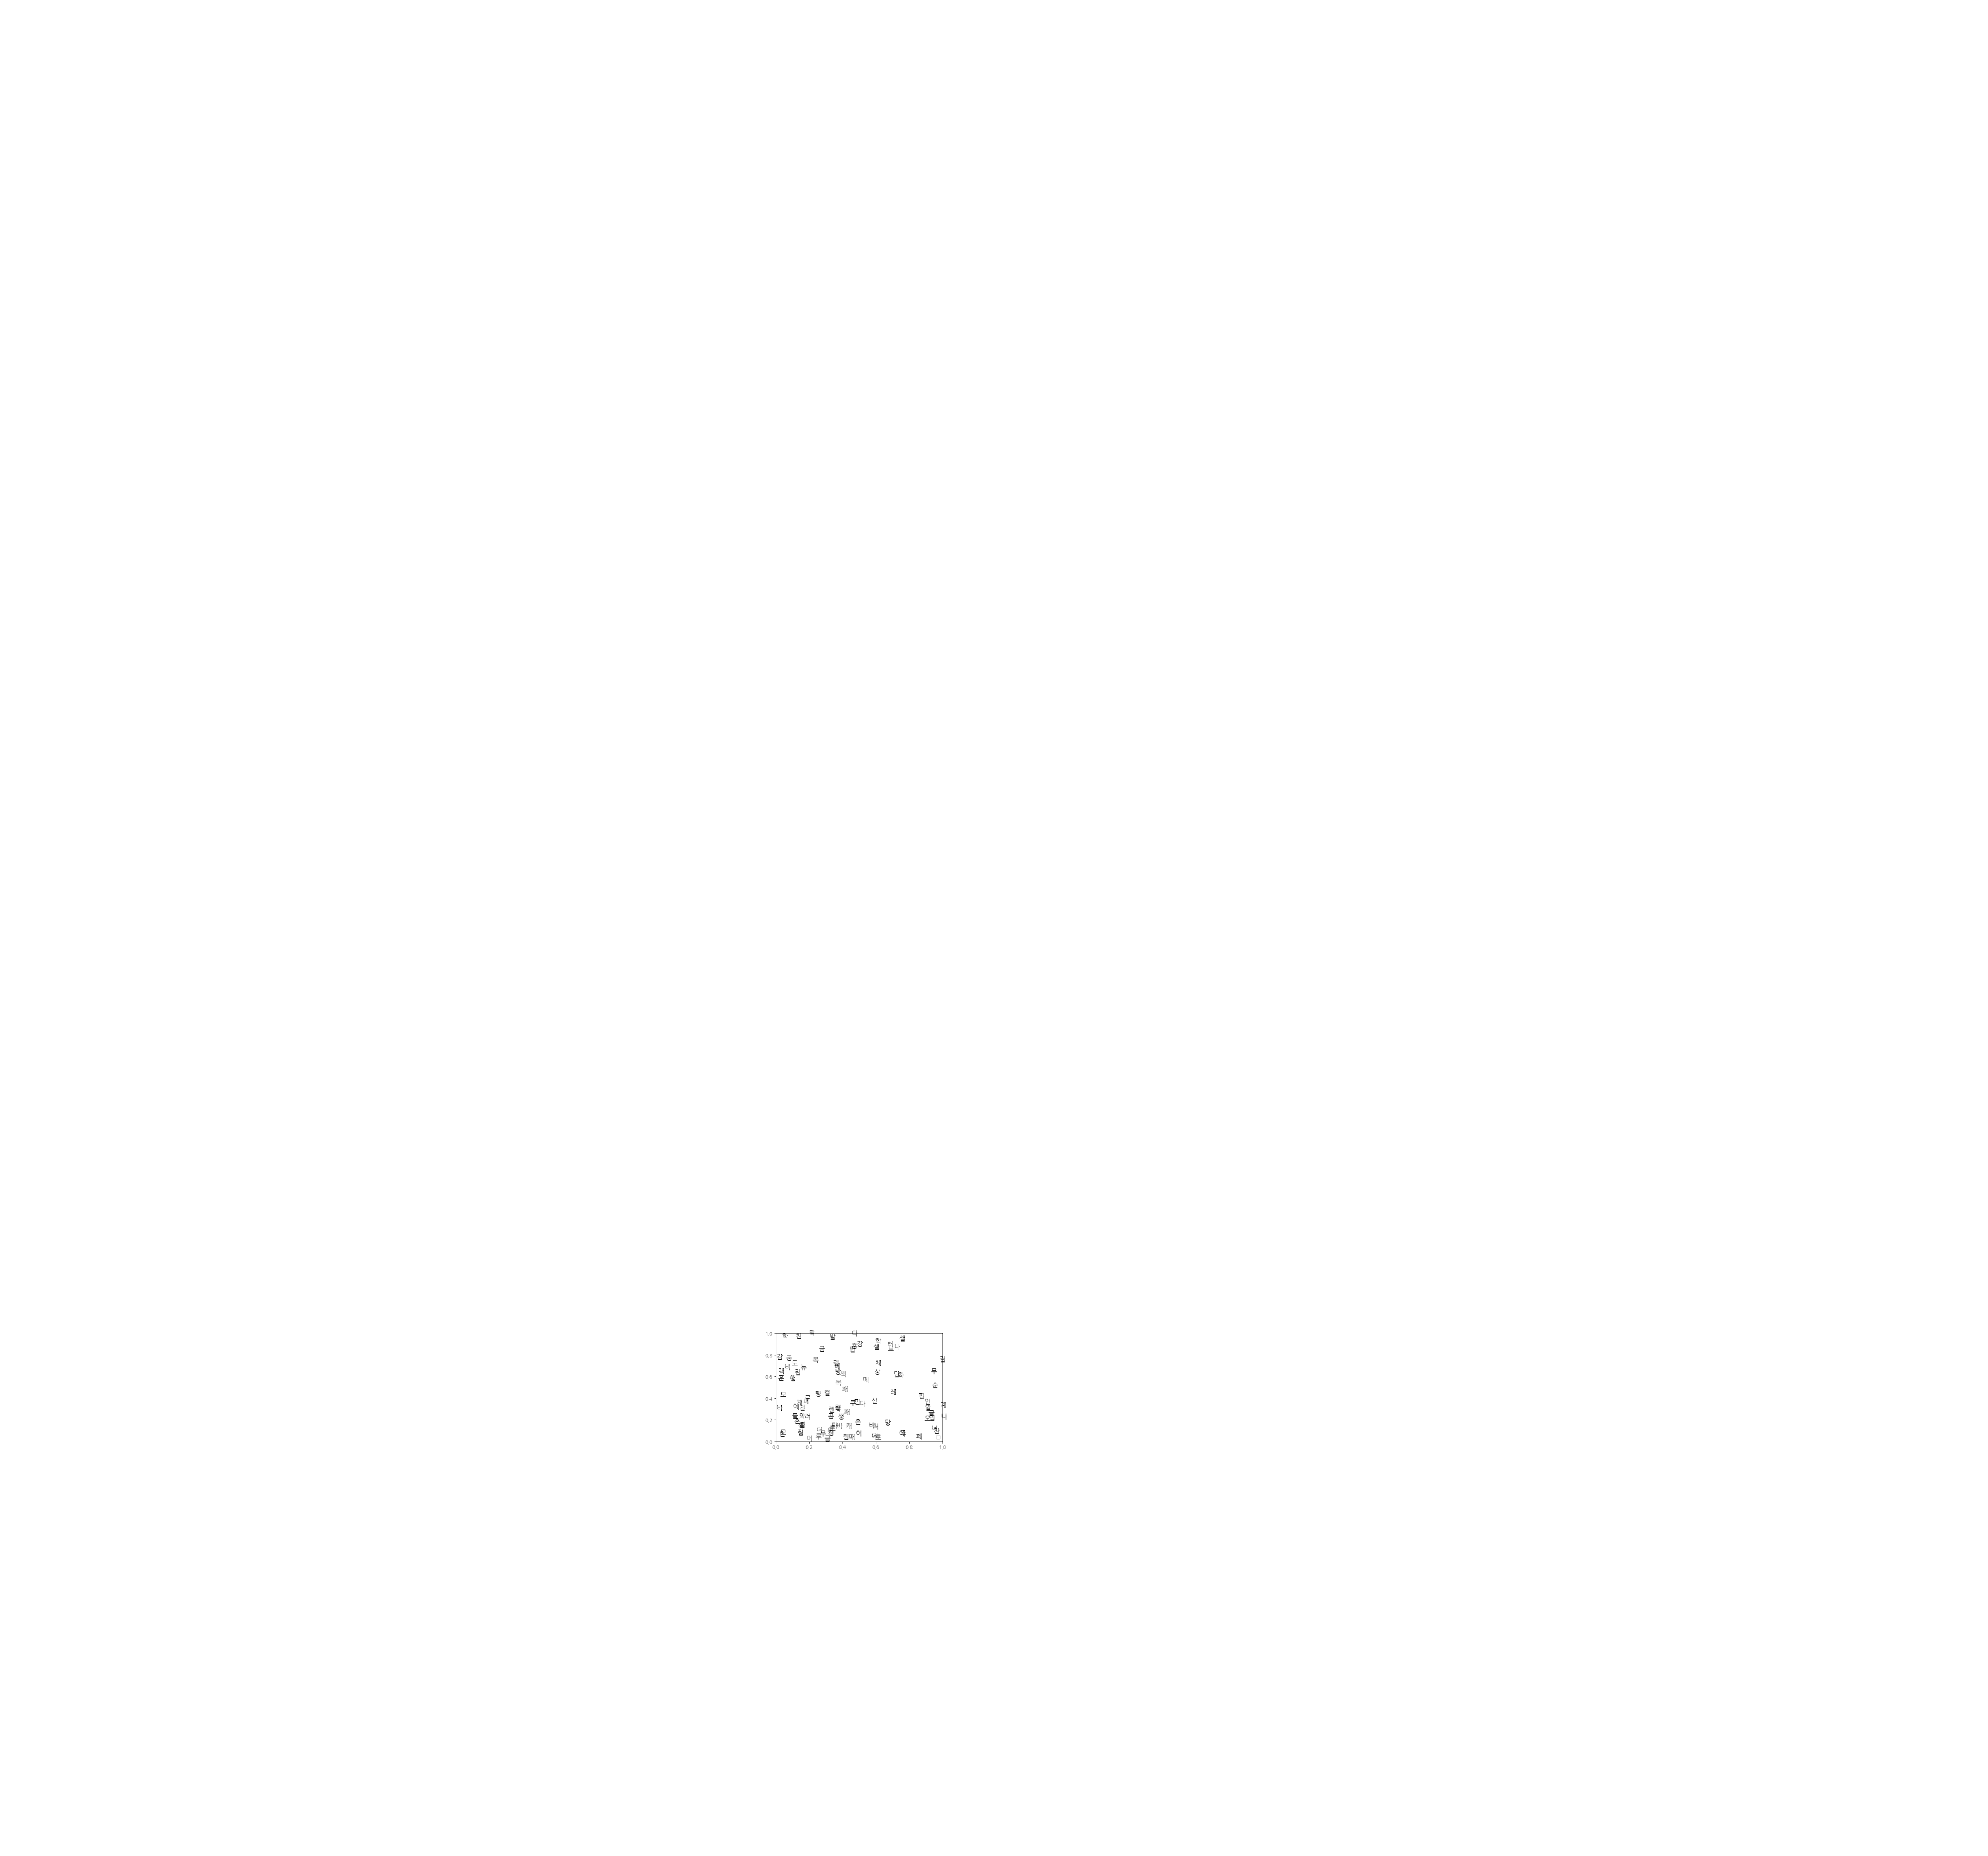

In [187]:
from sklearn.preprocessing import StandardScaler

for u, total in enumerate(words):
  plt.annotate(total, xy= (StandardScaler().fit_transform(result[:,0].reshape(-1,1))[u], StandardScaler().fit_transform(result[:,1].reshape(-1,1))[u]), fontsize=13)

for i, ht in enumerate(words_1):
	plt.annotate(ht, xy=(StandardScaler().fit_transform(result_1[:, 0].reshape(-1, 1))[i], StandardScaler().fit_transform(result_1[:, 1].reshape(-1, 1))[i]), fontsize=13)
for j, lt in enumerate(words_2):
  plt.annotate(lt, xy=(StandardScaler().fit_transform(result_2[:, 0].reshape(-1, 1))[j], StandardScaler().fit_transform(result_2[:, 1].reshape(-1, 1))[j]), fontsize=13)
# for k, hh in enumerate(words_3):
#   plt.annotate(hh, xy=(StandardScaler().fit_transform(result_3[:, 0].reshape(-1, 1))[k], StandardScaler().fit_transform(result_3[:, 1].reshape(-1, 1))[k]), fontsize=13)
# for l, lh in enumerate(words_4):
#   plt.annotate(lh, xy=(StandardScaler().fit_transform(result_4[:, 0].reshape(-1, 1))[l], StandardScaler().fit_transform(result_4[:, 1].reshape(-1, 1))[l]), fontsize=13)
# for m, rain in enumerate(words_5):
#   plt.annotate(rain, xy=(StandardScaler().fit_transform(result_5[:, 0].reshape(-1, 1))[m], StandardScaler().fit_transform(result_5[:, 1].reshape(-1, 1))[m]), fontsize=13)

  
# plt.legend(['Total','Rainy'],loc=4)  
# plt.legend(['high_temp','low_temp','high_hu','low_hu','Rainy day'],loc=4)
plt.legend(['Total','Hot','Cold'],loc=4)  


plt.show()